In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/home/supremekai/thesis/J0243_6p6124/hxmt/hxmt_reporting_spectra.csv",sep="\t")
df.head()

,Comments,ID,MJD,Energy,2.09848E+22,flux_og_90uncertain,flux_90_uncertain_edited,flux_low,flux_high,flux_err,...,chi sq/dof,index_1_err,norm_1_err,highecut_err,folding_energy_err,index_2_err,norm_2_err,const_1_err,const_2_err,const_3_err
0,NaN,P050427900101,60152.00000,28 keV,8.0,(9.672e-09 - 9.721e-09),"9.672e-09,9.721e-09",9.670000e-09,9.720000e-09,"(-2.54999999999991E-11,2.35000000000002E-11)",...,1325.46/1164,"(-0.00979974, 0.00978233)","(-0.0133868, 0.0135077)","(-0.567506, 0.591471)",NaN,NaN,NaN,NaN,"(-0.0068567, 0.00691248)",NaN
1,NaN,P050427900103,60153.04139,28 keV,NaN,(1.018e-08 - 1.023e-08),"1.018e-08,1.023e-08",1.020000e-08,1.020000e-08,"(-2.90000000000015E-11,2.0999999999999E-11)",...,1306.11/1164,"(-0.0081793, 0.00816712)","(-0.0122702, 0.0123634)","(-0.590365, 0.614562)",NaN,NaN,NaN,NaN,"(-0.00604194, 0.00608379)",NaN
2,NaN,P050427900104,60153.22361,28 keV,NaN,(9.754e-09 - 9.800e-09),"9.754e-09,9.800e-09",9.750000e-09,9.800000e-09,"(-2.32000000000005E-11,2.28000000000004E-11)",...,1350.16/1164,"(-0.00910554, 0.00909071)","(-0.0130184, 0.013128)","(-0.57775, 0.601851)",NaN,NaN,NaN,NaN,"(-0.006575, 0.0066248)",NaN
3,NaN,P050419600101,60154.00000,28 keV,NaN,(9.449e-09 - 9.483e-09),"9.449e-09,9.483e-09",9.450000e-09,9.480000e-09,"(-1.61999999999992E-11,1.77999999999997E-11)",...,1277.82/1164,"(-0.010371, 0.0103509)","(-0.013877, 0.0140103)","(-0.642178, 0.672808)",NaN,NaN,NaN,NaN,"(-0.00743205, 0.00749522)",NaN
4,NaN,P050419600102,60154.00000,28 keV,NaN,(9.350e-09 - 9.393e-09),"9.350e-09,9.393e-09",9.350000e-09,9.390000e-09,"(-2.43000000000004E-11,1.87000000000004E-11)",...,1308.54/1164,"(-0.0135659, 0.0135319)","(-0.0181835, 0.0184116)","(-0.937035, 0.999268)",NaN,NaN,NaN,NaN,"(-0.00985835, 0.00997017)",NaN


In [4]:
df_2=pd.read_csv("/home/supremekai/thesis/J0243_6p6124/nicer/reporting_spectra_iteration_2.csv",sep="\t")

df_2.columns

Index(['2.09848E+22', 'Flux (dist 6.8 kpc)', 'Lumin', 'MJD', 'Obs ID',
       'Continuum Model Extra', 'nH', 'index', 'norm', 'highecut',
       'folding_energy', 'lineE', 'lineSigma', 'reduced/chi-sq', 'nH_err',
       'index_err', 'norm_err', 'highecut_err', 'folding_energy_err',
       'lineE_err', 'lineSigma_err'],
      dtype='object')

In [5]:
df_old=pd.read_csv("/home/supremekai/thesis/J0243_6p6124/nicer/reporting_spectra_iteration_1.csv")

df_old.columns


Index(['comments', 'Flux (0.8-10.0)', 'Lumin', 'Chis-qaure for periodicity',
       'MJD', 'Obs ID', 'Continuum Model Extra', 'nH', 'nh_low', 'nh_hi', 'PI',
       'pi_low', 'pi_hi', 'norm', 'norm_low', 'norm_hi', 'kT', 'kt_low',
       'kt_hi', 'bbodyrad norm (disc radius proxy)', 'bbnorm_low', 'bbnorm_hi',
       'bbrad', 'bbrad_low', 'bbrad_hi', 'lineE', 'line_low', 'line_hi',
       'lineSigma', 'sigma_low', 'sigma_hi', 'reduced/chi-sq'],
      dtype='object')

In [6]:
def clean_nh_value(value):
    try:
        # Try converting to float
        return float(value)
    except ValueError:
        # Handle 'frozen' or other non-numeric cases
        return np.nan
df_2['nH'] = df_2['nH'].apply(clean_nh_value)
df_old['nH'] = df_old['nH'].apply(clean_nh_value)

In [7]:
# # Assuming yerr is already defined as:
# yerr = [np.abs(df_2['pi_low']), np.abs(df_2['pi_hi'])]

# # Create two subplots
# fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# # First plot: Powerlaw photon index vs Luminosity
# axes[0].errorbar(df_2['Lumin'], df_2['PI'], yerr=yerr, fmt='o', capsize=5, color='b', label='PI values')
# axes[0].set_title("Powerlaw Photon Index vs Luminosity", fontsize=12)
# axes[0].set_xlabel("Luminosity (erg/s)", fontsize=11)
# axes[0].set_ylabel("Photon Index (PI)", fontsize=11)
# axes[0].grid(True, linestyle='--', alpha=0.6)
# axes[0].legend()

# # Second plot: Powerlaw photon index vs MJD
# axes[1].errorbar(df_2['MJD'], df_2['PI'], yerr=yerr, fmt='o', capsize=5, color='r', label='PI values')
# axes[1].set_title("Powerlaw Photon Index vs MJD", fontsize=12)
# axes[1].set_xlabel("Modified Julian Date (MJD)", fontsize=11)
# axes[1].set_ylabel("Photon Index (PI)", fontsize=11)
# axes[1].grid(True, linestyle='--', alpha=0.6)
# axes[1].legend()

# # Show the plots
# plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Comments                  5 non-null      object 
 1   ID                        43 non-null     object 
 2   MJD                       43 non-null     float64
 3   Energy                    43 non-null     object 
 4   2.09848E+22               1 non-null      float64
 5   flux_og_90uncertain       43 non-null     object 
 6   flux_90_uncertain_edited  43 non-null     object 
 7   flux_low                  43 non-null     float64
 8   flux_high                 43 non-null     float64
 9   flux_err                  43 non-null     object 
 10  flux                      43 non-null     float64
 11  Lumin                     43 non-null     float64
 12  Model                     43 non-null     object 
 13  nH                        43 non-null     float64
 14  index_1     

In [9]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   2.09848E+22            23 non-null     object 
 1   Flux (dist 6.8 kpc)    50 non-null     float64
 2   Lumin                  50 non-null     float64
 3   MJD                    50 non-null     float64
 4   Obs ID                 50 non-null     int64  
 5   Continuum Model Extra  50 non-null     object 
 6   nH                     50 non-null     float64
 7   index                  50 non-null     float64
 8   norm                   50 non-null     float64
 9   highecut               17 non-null     float64
 10  folding_energy         17 non-null     float64
 11  lineE                  33 non-null     float64
 12  lineSigma              33 non-null     object 
 13  reduced/chi-sq         50 non-null     object 
 14  nH_err                 50 non-null     object 
 15  index_er

In [10]:
df = df[~(df['index_1'].isna() | (df['index_1'] == ''))]
# Add a sequential index if not already present
df = df.reset_index(drop=True)
df['seq'] = df.index  # sequential x-axis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Comments                  5 non-null      object 
 1   ID                        43 non-null     object 
 2   MJD                       43 non-null     float64
 3   Energy                    43 non-null     object 
 4   2.09848E+22               1 non-null      float64
 5   flux_og_90uncertain       43 non-null     object 
 6   flux_90_uncertain_edited  43 non-null     object 
 7   flux_low                  43 non-null     float64
 8   flux_high                 43 non-null     float64
 9   flux_err                  43 non-null     object 
 10  flux                      43 non-null     float64
 11  Lumin                     43 non-null     float64
 12  Model                     43 non-null     object 
 13  nH                        43 non-null     float64
 14  index_1     

In [11]:
def convert_asymmetric_errors(df, error_columns):
    """
    Converts asymmetric error string columns in the form '(-low, +high)' into two float columns.
    
    Parameters:
    - df: pandas DataFrame
    - error_columns: list of column names (string) containing the error string
    
    Returns:
    - df: updated DataFrame with added _err_low and _err_high columns for each error column
    """
    for col in error_columns:
        low_vals, high_vals = [], []
        
        for val in df[col]:
            if pd.isna(val) or val == '—':
                low, high = np.nan, np.nan
            else:
                try:
                    low_str, high_str = val.strip('()').split(',')
                    low, high = abs(float(low_str)), abs(float(high_str))
                except Exception as e:
                    low, high = np.nan, np.nan  # fallback if malformed
            low_vals.append(low)
            high_vals.append(high)
        
        df[f"{col}_low"] = low_vals
        df[f"{col}_high"] = high_vals
    
    return df

error_cols = [col for col in df.columns if col.endswith('err')]

df = convert_asymmetric_errors(df, error_cols)

error_cols_2 = [col for col in df_2.columns if col.endswith('err')]

df_2 = convert_asymmetric_errors(df_2, error_cols_2)

error_cols_old = [col for col in df_old.columns if col.endswith('err')]

df_old = convert_asymmetric_errors(df_old, error_cols_old)

In [12]:
def plot_asymmetric_errorbars(
    df, x_col, y_col, yerr_low_col, yerr_high_col,
    xlabel=None, ylabel=None, title=None, figsize=(8, 5), color='tab:blue', marker='o'
):
    """
    Plots a scatter plot with asymmetric error bars using matplotlib.

    Parameters:
        df (pd.DataFrame): The dataframe containing your data
        x_col (str): Name of the x-axis column
        y_col (str): Name of the y-axis column
        yerr_low_col (str): Column with lower error values
        yerr_high_col (str): Column with upper error values
        xlabel (str): Label for x-axis
        ylabel (str): Label for y-axis
        title (str): Plot title
        figsize (tuple): Figure size
        color (str): Color of the markers and error bars
        marker (str): Marker style
    """
    x = df[x_col]
    y = df[y_col]
    yerr = np.array([df[yerr_low_col], df[yerr_high_col]])

    plt.figure(figsize=figsize)
    plt.errorbar(x, y, yerr=yerr, fmt=marker, ecolor=color, capsize=5, color=color, linestyle='None')
    plt.xlabel(xlabel or x_col)
    plt.ylabel(ylabel or y_col)
    plt.title(title or f'{y_col} vs {x_col}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [13]:
df_2 = df_2.reset_index(drop=True)
df_2['seq'] = df_2.index  # sequential x-axis
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   2.09848E+22              23 non-null     object 
 1   Flux (dist 6.8 kpc)      50 non-null     float64
 2   Lumin                    50 non-null     float64
 3   MJD                      50 non-null     float64
 4   Obs ID                   50 non-null     int64  
 5   Continuum Model Extra    50 non-null     object 
 6   nH                       50 non-null     float64
 7   index                    50 non-null     float64
 8   norm                     50 non-null     float64
 9   highecut                 17 non-null     float64
 10  folding_energy           17 non-null     float64
 11  lineE                    33 non-null     float64
 12  lineSigma                33 non-null     object 
 13  reduced/chi-sq           50 non-null     object 
 14  nH_err                   50 

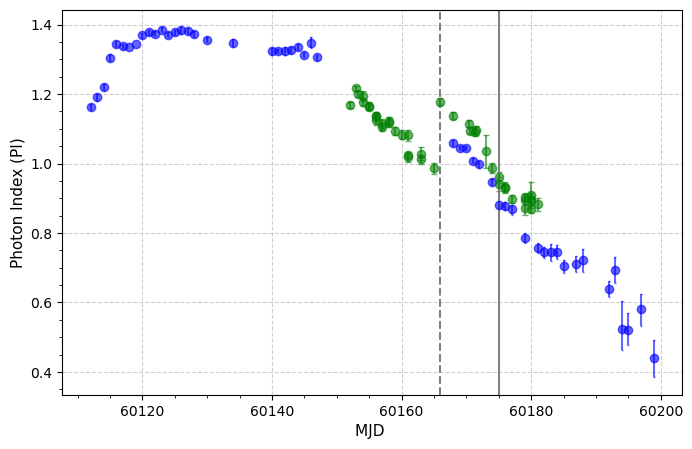

In [59]:
plt.figure(figsize=(8, 5))

yerr = [np.abs(df_2['index_err_low']), np.abs(df_2['index_err_high'])]
plt.errorbar(df_2['MJD'], df_2['index'], yerr=yerr, fmt='o', capsize=1, color='b', label='NICER',alpha=0.6)
yerr2 = np.array([df['index_1_err_low'], df['index_1_err_high']])
plt.errorbar(df['MJD'], df['index_1'], yerr=yerr2, fmt='o', capsize=2, color='g', label='HXMT', alpha=0.6)
plt.axvline(x=60166,color="grey",linestyle="--")
plt.axvline(x=60175,color="grey",linestyle="-")
# yerr_old=[np.abs(df_old['pi_low']), np.abs(df_old['pi_hi'])]
# plt.errorbar(df_old['MJD'], df_old['PI'], yerr=yerr_old, fmt='o', capsize=1, color='g', label='PI_old',alpha=0.3)

plt.xlabel("MJD ", fontsize=11)
plt.ylabel("Photon Index (PI)", fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
#plt.xlim(60150,60181)
plt.minorticks_on()
plt.show()

# plot_asymmetric_errorbars(
#     df,
#     x_col='seq',
#     y_col='index_1',
#     yerr_low_col='index_1_err_low',
#     yerr_high_col='index_1_err_high',
#     xlabel='Observation Index',
#     ylabel='Photon Index 1',
#     title='Photon Index 1 with Asymmetric Errors',
#     color='tab:green'
# )


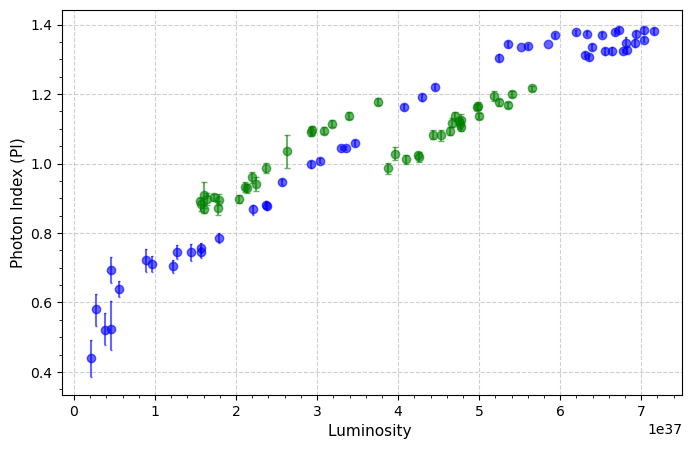

In [15]:
plt.figure(figsize=(8, 5))

yerr = [np.abs(df_2['index_err_low']), np.abs(df_2['index_err_high'])]
plt.errorbar(df_2['Lumin'], df_2['index'], yerr=yerr, fmt='o', capsize=1, color='b', label='NICER',alpha=0.6)
yerr2 = np.array([df['index_1_err_low'], df['index_1_err_high']])
plt.errorbar(df['Lumin'], df['index_1'], yerr=yerr2, fmt='o', capsize=2, color='g', label='HXMT', alpha=0.6)

# yerr_old=[np.abs(df_old['pi_low']), np.abs(df_old['pi_hi'])]
# plt.errorbar(df_old['Lumin'], df_old['PI'], yerr=yerr_old, fmt='o', capsize=1, color='g', label='PI_old',alpha=0.3)

#plt.title("Powerlaw Photon Index vs sequence", fontsize=12)
plt.xlabel("Luminosity ", fontsize=11)
plt.ylabel("Photon Index (PI)", fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.minorticks_on()
#plt.xlim(60150,60181)
plt.show()

In [16]:
df_old.columns

Index(['comments', 'Flux (0.8-10.0)', 'Lumin', 'Chis-qaure for periodicity',
       'MJD', 'Obs ID', 'Continuum Model Extra', 'nH', 'nh_low', 'nh_hi', 'PI',
       'pi_low', 'pi_hi', 'norm', 'norm_low', 'norm_hi', 'kT', 'kt_low',
       'kt_hi', 'bbodyrad norm (disc radius proxy)', 'bbnorm_low', 'bbnorm_hi',
       'bbrad', 'bbrad_low', 'bbrad_hi', 'lineE', 'line_low', 'line_hi',
       'lineSigma', 'sigma_low', 'sigma_hi', 'reduced/chi-sq'],
      dtype='object')

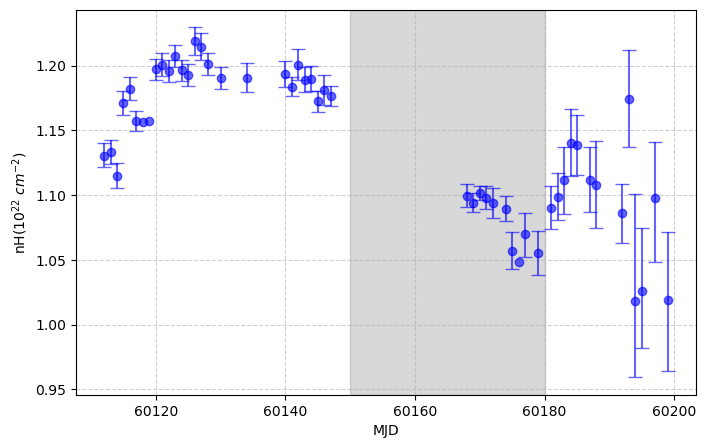

In [17]:
plt.figure(figsize=(8, 5))
nh_yerr = [np.abs(df_2['nH_err_low']), np.abs(df_2['nH_err_high'])]
plt.errorbar(df_2['MJD'], df_2['nH'], yerr=nh_yerr, fmt='o', capsize=5, color='b', label='nH_new', alpha=0.6)
plt.ylabel("nH($10^{22}~cm^{-2}$)")
plt.xlabel("MJD")
nh_yerr_old = [np.abs(df_old['nh_low']), np.abs(df_old['nh_hi'])]
# plt.errorbar(df_old['MJD'], df_old['nH'], yerr=nh_yerr_old, fmt='o', capsize=1, color='magenta', label='nH_old', alpha=0.3)
# plt.plot(df['MJD'], df['nH'], 'o', color='green', label='nH_HXMT', alpha=0.3)

# Add shaded region
plt.axvspan(60150, 60180, color='gray', alpha=0.3, label='Shaded Region')

# plt.legend()
plt.grid(alpha=0.6, linestyle='--')


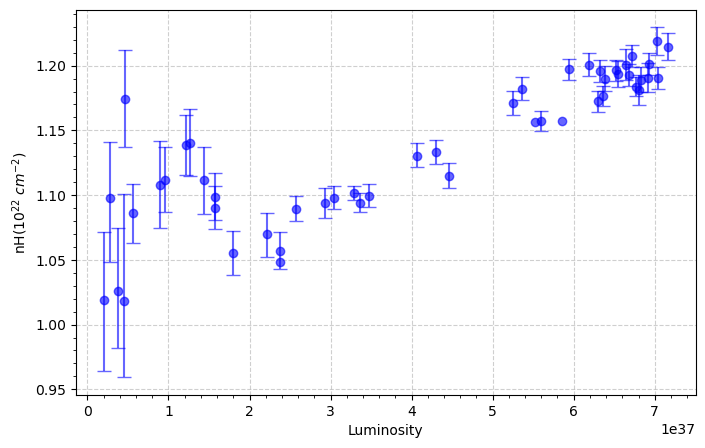

In [18]:
plt.figure(figsize=(8, 5))
nh_yerr = [np.abs(df_2['nH_err_low']), np.abs(df_2['nH_err_high'])]
plt.errorbar(df_2['Lumin'], df_2['nH'], yerr=nh_yerr, fmt='o', capsize=5, color='b', label='nH_new',alpha=0.6)
nh_yerr_old=[np.abs(df_old['nh_low']), np.abs(df_old['nh_hi'])]
#plt.errorbar(df_old['Lumin'], df_old['nH'], yerr=nh_yerr_old, fmt='o', capsize=1, color='magenta', label='nH_old',alpha=0.3)
plt.ylabel("nH($10^{22}~cm^{-2}$)")
plt.xlabel("Luminosity")
# plt.legend()
plt.grid(alpha=0.6,linestyle='--')
plt.minorticks_on()

In [19]:
df.columns

Index(['Comments', 'ID', 'MJD', 'Energy', '2.09848E+22', 'flux_og_90uncertain',
       'flux_90_uncertain_edited', 'flux_low', 'flux_high', 'flux_err', 'flux',
       'Lumin', 'Model', 'nH', 'index_1', 'norm_1', 'highecut',
       'folding_energy', 'index_2', 'norm_2', 'const_1', 'const_2', 'const_3',
       'chi sq/dof', 'index_1_err', 'norm_1_err', 'highecut_err',
       'folding_energy_err', 'index_2_err', 'norm_2_err', 'const_1_err',
       'const_2_err', 'const_3_err', 'seq', 'flux_err_low', 'flux_err_high',
       'index_1_err_low', 'index_1_err_high', 'norm_1_err_low',
       'norm_1_err_high', 'highecut_err_low', 'highecut_err_high',
       'folding_energy_err_low', 'folding_energy_err_high', 'index_2_err_low',
       'index_2_err_high', 'norm_2_err_low', 'norm_2_err_high',
       'const_1_err_low', 'const_1_err_high', 'const_2_err_low',
       'const_2_err_high', 'const_3_err_low', 'const_3_err_high'],
      dtype='object')

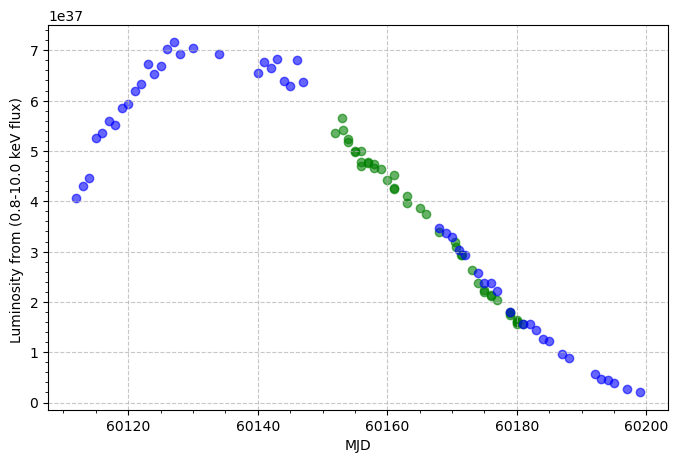

In [47]:
plt.figure(figsize=(8, 5))
plt.scatter(df['MJD'], df['Lumin'], color='g', label='Luminosity_HXMT',alpha=0.6)
plt.scatter(df_2['MJD'], df_2['Lumin'], color='b', label='Luminosity_NICER',alpha=0.6)
#plt.scatter(df_old['MJD'], df_old['Lumin'], color='r', label='Luminosity_NICER_old',alpha=0.6)
plt.ylabel("Luminosity from (0.8-10.0 keV flux) ")
plt.xlabel("MJD")
plt.grid(linestyle="--",alpha=0.7)
plt.minorticks_on()

In [21]:
df.columns

Index(['Comments', 'ID', 'MJD', 'Energy', '2.09848E+22', 'flux_og_90uncertain',
       'flux_90_uncertain_edited', 'flux_low', 'flux_high', 'flux_err', 'flux',
       'Lumin', 'Model', 'nH', 'index_1', 'norm_1', 'highecut',
       'folding_energy', 'index_2', 'norm_2', 'const_1', 'const_2', 'const_3',
       'chi sq/dof', 'index_1_err', 'norm_1_err', 'highecut_err',
       'folding_energy_err', 'index_2_err', 'norm_2_err', 'const_1_err',
       'const_2_err', 'const_3_err', 'seq', 'flux_err_low', 'flux_err_high',
       'index_1_err_low', 'index_1_err_high', 'norm_1_err_low',
       'norm_1_err_high', 'highecut_err_low', 'highecut_err_high',
       'folding_energy_err_low', 'folding_energy_err_high', 'index_2_err_low',
       'index_2_err_high', 'norm_2_err_low', 'norm_2_err_high',
       'const_1_err_low', 'const_1_err_high', 'const_2_err_low',
       'const_2_err_high', 'const_3_err_low', 'const_3_err_high'],
      dtype='object')

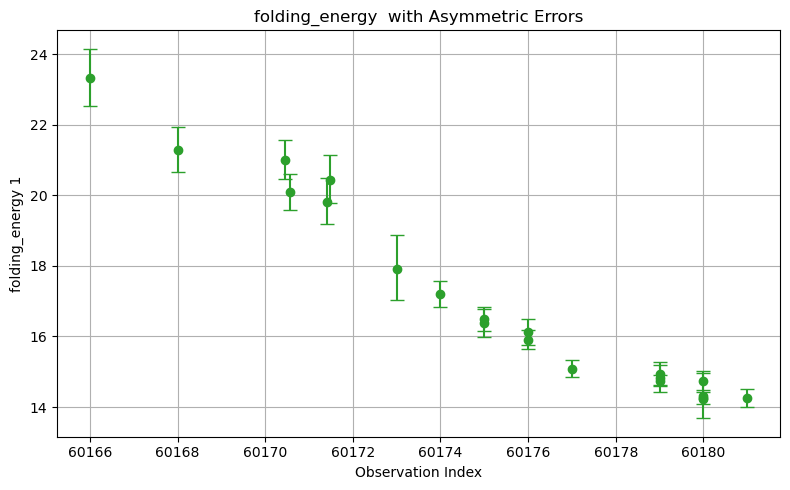

In [22]:
plot_asymmetric_errorbars(
    df,
    x_col='MJD',
    y_col='folding_energy',
    yerr_low_col='folding_energy_err_low',
    yerr_high_col='folding_energy_err_high',
    xlabel='Observation Index',
    ylabel='folding_energy 1',
    title='folding_energy  with Asymmetric Errors',
    color='tab:green'
)


In [23]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   2.09848E+22              23 non-null     object 
 1   Flux (dist 6.8 kpc)      50 non-null     float64
 2   Lumin                    50 non-null     float64
 3   MJD                      50 non-null     float64
 4   Obs ID                   50 non-null     int64  
 5   Continuum Model Extra    50 non-null     object 
 6   nH                       50 non-null     float64
 7   index                    50 non-null     float64
 8   norm                     50 non-null     float64
 9   highecut                 17 non-null     float64
 10  folding_energy           17 non-null     float64
 11  lineE                    33 non-null     float64
 12  lineSigma                33 non-null     object 
 13  reduced/chi-sq           50 non-null     object 
 14  nH_err                   50 

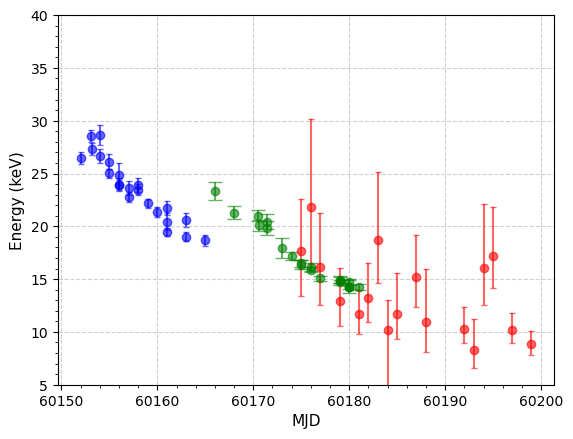

In [60]:
# Filter rows where folding_energy is NaN
filtered_df = df[df['folding_energy'].isna()]

# Plot folding energy from df
yerr_folding = [np.abs(df['folding_energy_err_low']), np.abs(df['folding_energy_err_high'])]
plt.errorbar(df['MJD'], df['folding_energy'], yerr=yerr_folding, fmt='o', capsize=5, color='g', label='Folding Energy (df)', alpha=0.6)

# Plot highecut from df for rows where folding_energy is NaN
yerr_high2 = np.array([filtered_df['highecut_err_low'], filtered_df['highecut_err_high']])
plt.errorbar(filtered_df['MJD'], filtered_df['highecut'], yerr=yerr_high2, fmt='o', capsize=2, color='b', label='Highecut (df)', alpha=0.6)

# Plot highecut from df_2
yerr_highecut_df2 = [np.abs(df_2['folding_energy_err_low']), np.abs(df_2['folding_energy_err_high'])]
plt.errorbar(df_2['MJD'], df_2['folding_energy'], yerr=yerr_highecut_df2, fmt='o', capsize=2, color='r', label='Highecut (df_2)', alpha=0.6)

#plt.axvline(x=60166, color='gray', linestyle='--')
# Add labels, legend, and grid
plt.grid(True, linestyle='--', alpha=0.6)
plt.minorticks_on()
plt.xlabel("MJD", fontsize=11)
plt.ylabel("Energy (keV)", fontsize=11)
plt.ylim(5, 40)
#plt.legend()
plt.show()

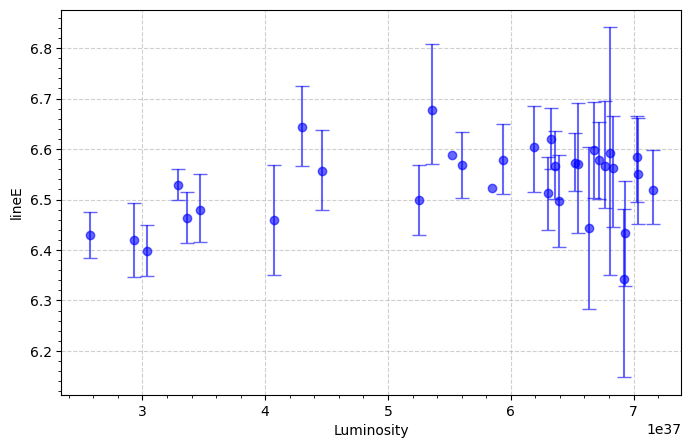

In [25]:
# Plot lineE vs Luminosity with error bars
plt.figure(figsize=(8, 5))
yerr_lineE = [np.abs(df_2['lineE_err_low']), np.abs(df_2['lineE_err_high'])]
plt.errorbar(df_2['Lumin'], df_2['lineE'], yerr=yerr_lineE, fmt='o', color='b', alpha=0.6, capsize=5)
plt.xlabel("Luminosity")
plt.ylabel("lineE")
plt.grid(alpha=0.6, linestyle='--')
plt.minorticks_on()
#plt.title("lineE vs Luminosity")
plt.show()


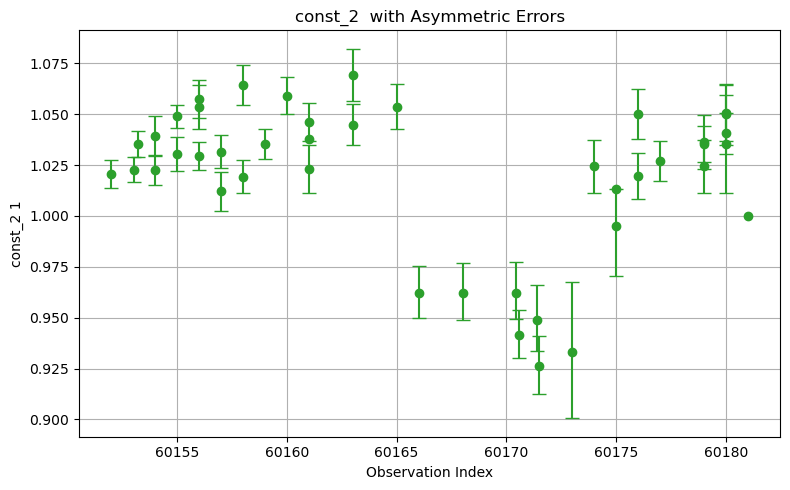

In [26]:
plot_asymmetric_errorbars(
    df,
    x_col='MJD',
    y_col='const_2',
    yerr_low_col='const_2_err_low',
    yerr_high_col='const_2_err_high',
    xlabel='Observation Index',
    ylabel='const_2 1',
    title='const_2  with Asymmetric Errors',
    color='tab:green'
)


### Plot luminosity and subpanel of period

In [27]:
he_df=pd.read_csv('/home/supremekai/thesis/J0243_6p6124/hxmt/final_all_hxmt_lc_periods_chisq_HE_manual.txt',sep='\t',comment="#")
me_df=pd.read_csv('/home/supremekai/thesis/J0243_6p6124/hxmt/final_all_hxmt_lc_periods_chisq_ME_manual.txt',sep='\t',comment="#")
le_df=pd.read_csv('/home/supremekai/thesis/J0243_6p6124/hxmt/final_all_hxmt_lc_periods_chisq_LE_manual.txt',sep='\t',comment="#")
nicer_df=pd.read_csv('/home/supremekai/thesis/J0243_6p6124/nicer/all_lc_periods_evt_files_bary_orbit_piexpiex_manual.txt', sep='\t',comment="#")
he_df = he_df[he_df['PErr'] != 0]
me_df = me_df[me_df['PErr'] != 0]
le_df = le_df[le_df['PErr'] != 0]
Nicer_freqErr=1000*nicer_df['PErr']/nicer_df['Period']**2

he_df_freqErr=1000*he_df['PErr']/he_df['Period']**2

me_df_freqErr=1000*me_df['PErr']/me_df['Period']**2

le_df_freqErr=1000*le_df['PErr']/le_df['Period']**2


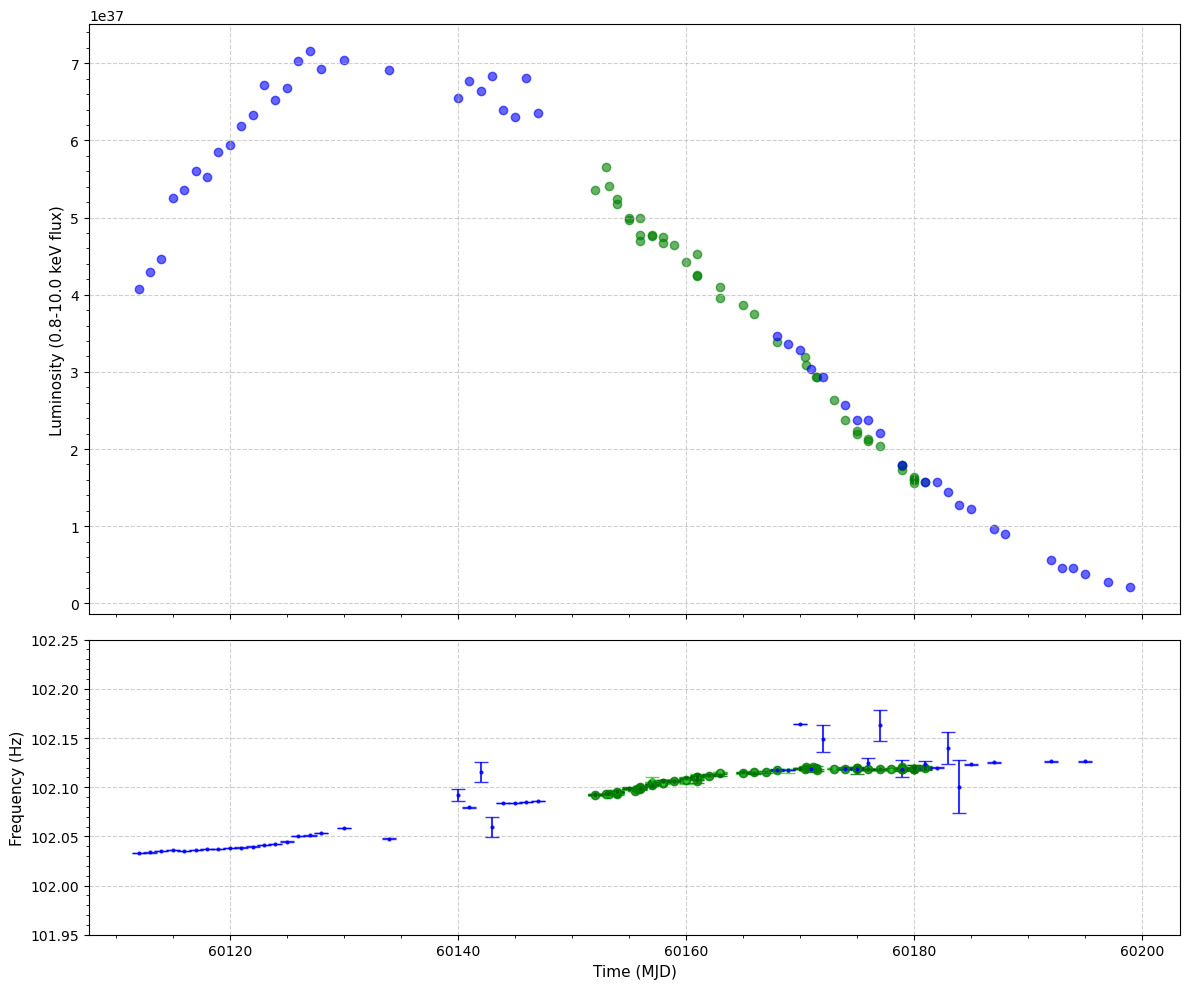

In [42]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# Upper panel: Luminosity variation
axes[0].scatter(df['MJD'], df['Lumin'], color='g', label='Luminosity_HXMT', alpha=0.6)
axes[0].scatter(df_2['MJD'], df_2['Lumin'], color='b', label='Luminosity_NICER', alpha=0.6)
axes[0].set_ylabel("Luminosity (0.8-10.0 keV flux)", fontsize=11)
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].minorticks_on()
#axes[0].set_title("Luminosity and Period Evolution", fontsize=12)

# Lower panel: Frequency evolution with color scheme highlighting HXMT as green and NICER as blue
axes[1].errorbar(he_df['Date'] + 40000, he_df['freq'], yerr=he_df_freqErr, fmt='o', capsize=5, markersize=6, alpha=0.8, label="HE (HXMT)", color='green')
axes[1].errorbar(me_df['Date'] + 40000, me_df['freq'], yerr=me_df_freqErr, fmt='o', capsize=5, markersize=2, alpha=0.8, label="ME (HXMT)", color='limegreen')
axes[1].errorbar(le_df['Date'] + 40000, le_df['freq'], yerr=le_df_freqErr, fmt='o', capsize=5, markersize=2, alpha=0.8, label="LE (HXMT)", color='darkgreen')
axes[1].errorbar(nicer_df['TSTARTI'] + 40000, nicer_df['freq'], yerr=Nicer_freqErr, fmt='o', capsize=5, markersize=2, alpha=0.8, color='blue', label="NICER")
axes[1].set_ylabel("Frequency (Hz)", fontsize=11)
axes[1].set_xlabel("Time (MJD)", fontsize=11)
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_ylim(101.95,102.25)
axes[1].minorticks_on()
plt.tight_layout()
